In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

In [3]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")
train_main = train.copy()
test_main = test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

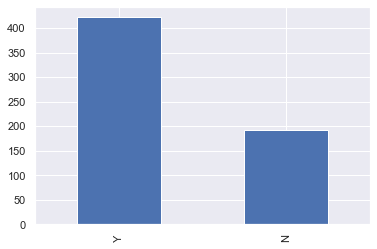

In [5]:
train['Loan_Status'].value_counts().plot.bar()

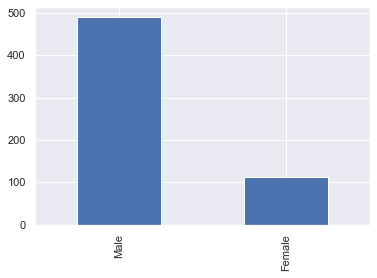

In [6]:
train['Gender'].value_counts().plot.bar()

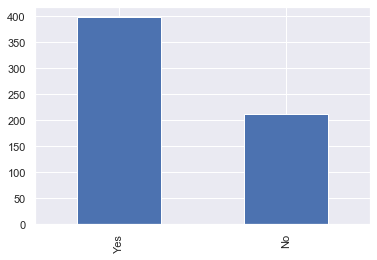

In [7]:
train['Married'].value_counts().plot.bar()

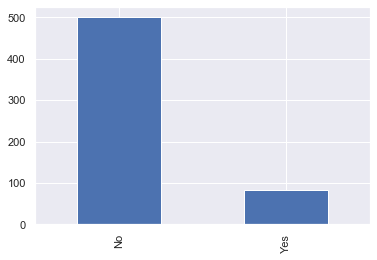

In [8]:
train['Self_Employed'].value_counts().plot.bar()

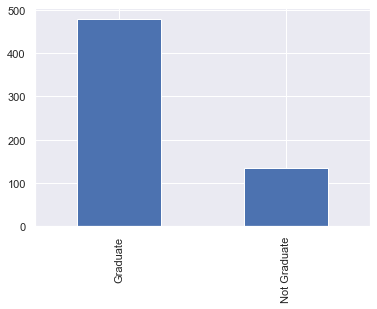

In [9]:
train['Education'].value_counts().plot.bar()

In [10]:
train['Gender'] = train['Gender'].map({'Female':0,'Male':1})
train['Married'] = train['Married'].map({'No':0, 'Yes':1})
train['Education'] = train['Education'].map({'Not Graduate':0, 'Graduate':1})
train['Self_Employed'] = train['Self_Employed'].map({'No':0, 'Yes':1})
train['Property_Area'] = train['Property_Area'].map({'Urban':3, 'Semiurban':2, 'Rural':1})
train['Loan_Status'] = train['Loan_Status'].map({'N':0, 'Y':1})

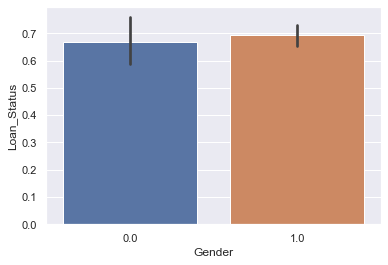

In [11]:
sns.barplot(x = 'Gender', y ='Loan_Status', data=train)

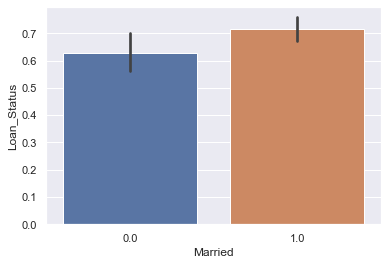

In [12]:
sns.barplot(x = 'Married', y ='Loan_Status', data=train)

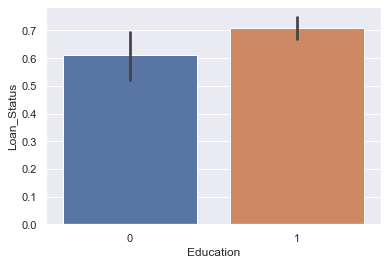

In [13]:
sns.barplot(x ='Education', y ='Loan_Status', data=train)

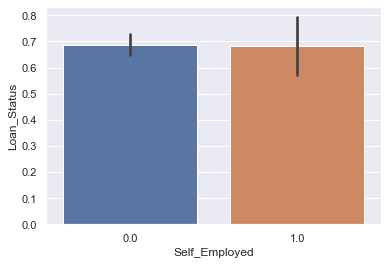

In [14]:
sns.barplot(x ='Self_Employed', y ='Loan_Status', data=train)

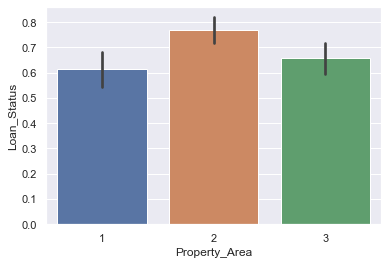

In [15]:
sns.barplot(x ='Property_Area', y ='Loan_Status', data=train)

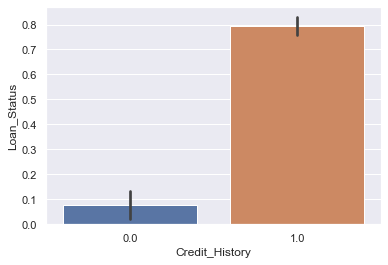

In [16]:
sns.barplot(x ='Credit_History', y ='Loan_Status', data=train)

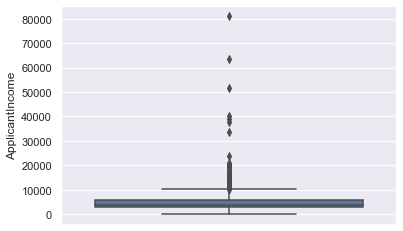

In [17]:
sns.boxplot(y='ApplicantIncome', data=train)

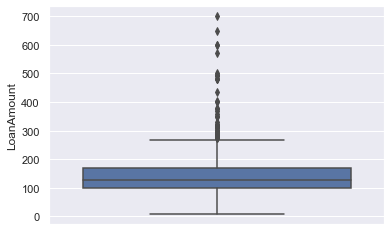

In [18]:
sns.boxplot(y='LoanAmount', data=train)

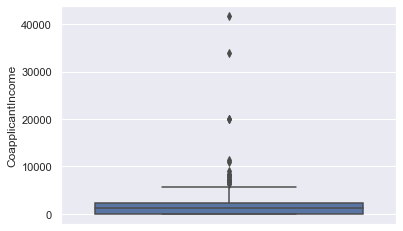

In [19]:
sns.boxplot(y='CoapplicantIncome', data=train)

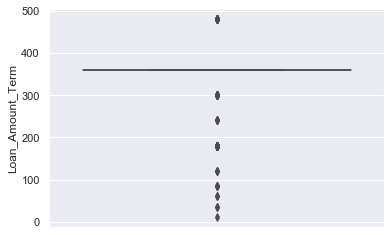

In [20]:
sns.boxplot(y='Loan_Amount_Term', data=train)

Credit_History  Loan_Status
0.0             0              0.921348
                1              0.078652
1.0             1              0.795789
                0              0.204211
Name: Loan_Status, dtype: float64

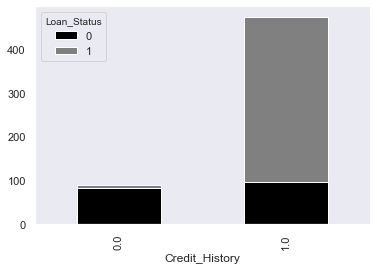

In [25]:
tab1 = pd.crosstab(train['Credit_History'], train['Loan_Status'])
tab1.plot(kind='bar', stacked=True, color=['black', 'grey'], grid=False)
train.groupby(['Credit_History'])['Loan_Status'].value_counts(normalize=True)

Gender  Loan_Status
0.0     1              0.669643
        0              0.330357
1.0     1              0.693252
        0              0.306748
Name: Loan_Status, dtype: float64

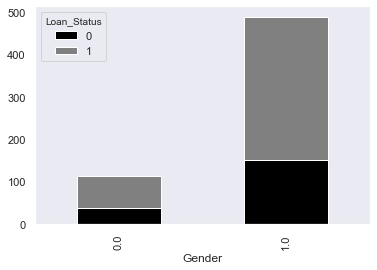

In [24]:
tab2 = pd.crosstab(train['Gender'], train['Loan_Status'])
tab2.plot(kind='bar', stacked=True, color=['black', 'grey'], grid=False)
train.groupby(['Gender'])['Loan_Status'].value_counts(normalize=True)

Education  Loan_Status
0          1              0.611940
           0              0.388060
1          1              0.708333
           0              0.291667
Name: Loan_Status, dtype: float64

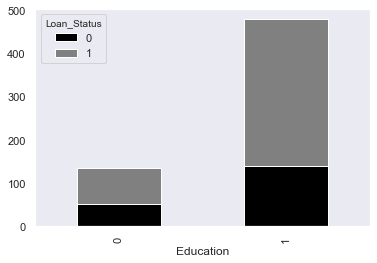

In [26]:
tab3 =  pd.crosstab(train['Education'], train['Loan_Status'])
tab3.plot(kind='bar', stacked=True, color=['black', 'grey'], grid=False)
train.groupby(['Education'])['Loan_Status'].value_counts(normalize=True)

Married  Loan_Status
0.0      1              0.629108
         0              0.370892
1.0      1              0.716080
         0              0.283920
Name: Loan_Status, dtype: float64

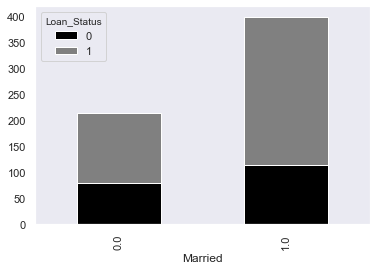

In [27]:
tab4 =  pd.crosstab(train['Married'], train['Loan_Status'])
tab4.plot(kind='bar', stacked=True, color=['black', 'grey'], grid=False)
train.groupby(['Married'])['Loan_Status'].value_counts(normalize=True)

Self_Employed  Loan_Status
0.0            1              0.686000
               0              0.314000
1.0            1              0.682927
               0              0.317073
Name: Loan_Status, dtype: float64

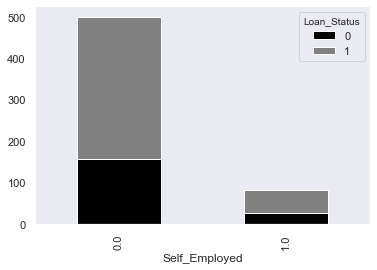

In [31]:
tab5 =  pd.crosstab(train['Self_Employed'], train['Loan_Status'])
tab5.plot(kind='bar', stacked=True, color=['black', 'grey'], grid=False)
train.groupby(['Self_Employed'])['Loan_Status'].value_counts(normalize=True)

Dependents  Loan_Status
0           1              0.689855
            0              0.310145
1           1              0.647059
            0              0.352941
2           1              0.752475
            0              0.247525
3+          1              0.647059
            0              0.352941
Name: Loan_Status, dtype: float64

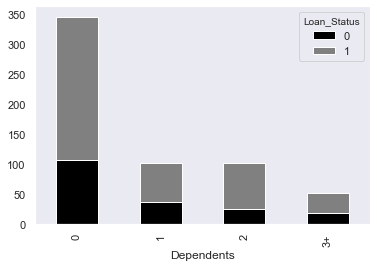

In [30]:
tab6 =  pd.crosstab(train['Dependents'], train['Loan_Status'])
tab6.plot(kind='bar', stacked=True, color=['black', 'grey'], grid=False)
train.groupby(['Dependents'])['Loan_Status'].value_counts(normalize=True)

# correlation between all the numerical variables

In [40]:
train_num=train.drop(['Gender', 'Dependents', 'Self_Employed', 'Education', 'Property_Area','Married'], axis=1)

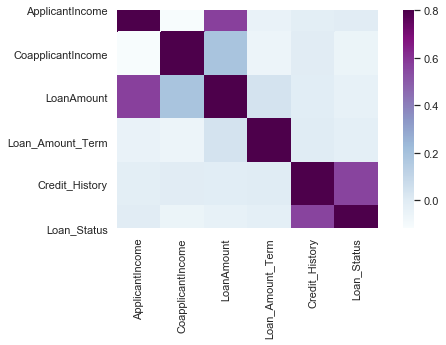

In [48]:
matrix = train_num.corr()
f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.




### Checking for Outliners in the Numeric data

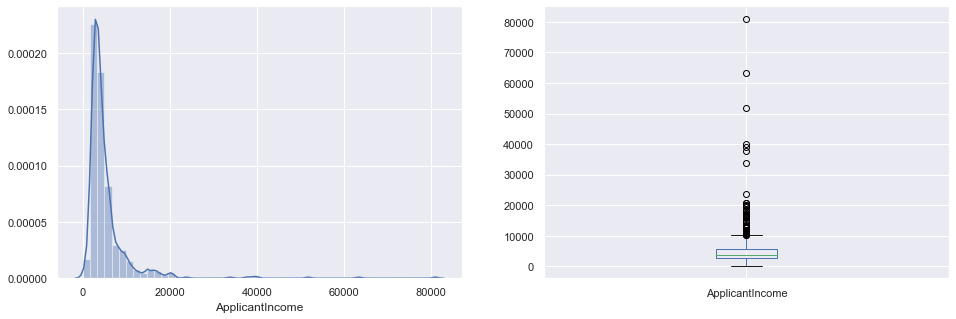

In [58]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

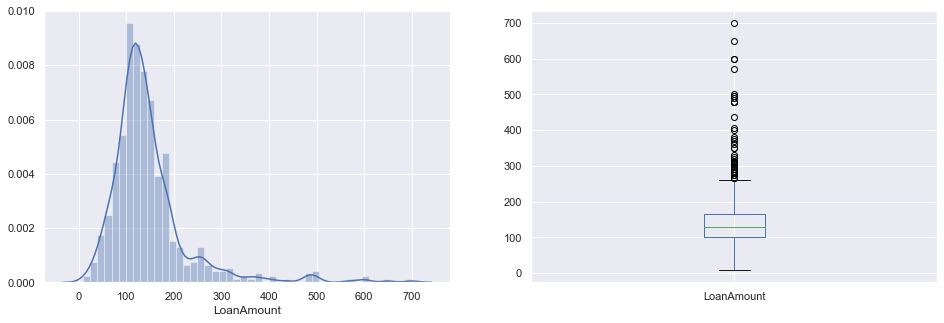

In [60]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

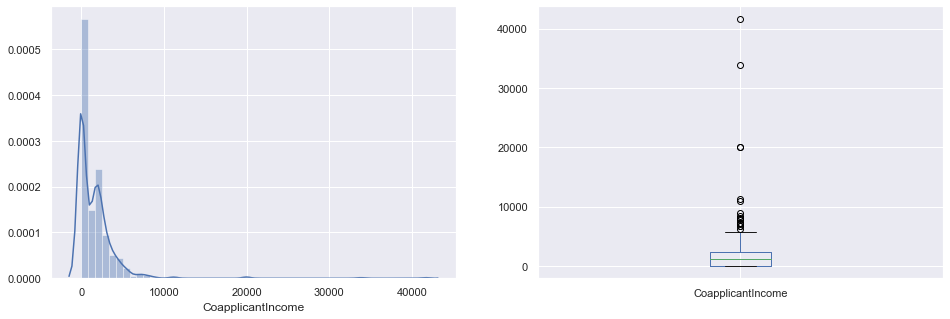

In [61]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()